# — Human Baseline: Labeling Body Material —

# Step 0: Preparation for labeling

### Before you start labeling, please make sure the following steps are taken:

0. You have **deleted all old/useless images in folder "bodies_to_be_labeled"** and **deleted all old/useless label CSV files in folder "labels"**;
1. You have downloaded your responsible dataset packet from Google Drive, and have copied **ALL images** from it to the folder "bodies_to_be_labeled";
2. You have indicated on the **spreadsheet** that you have downloaded your responsible dataset packet for labeling;
3. \[Can Ignore\]: You have run **"git pull"** to obtain the latest code (if applicable) for dataset labeling;
4. You have **sufficient time and energy** to complete the labeling (ideally in one go);
5. **DON'T close the Windows Powershell (or Anaconda window)** unless you have completed all labeling (as it will shutdown your kernel).

*TIP 1:* Select a cell, and press **"Ctrl+Enter"** to run that cell.

*TIP 2:* To resume from the place you left, rerun all cells, and put in your name and dataset ID EXACTLY as before.

### Packages that you may need to install:

1. pandas ("pip install pandas")
2. matplotlib ("pip install matplotlib")
3. ipywidgets ("pip install ipywidgets")
4. meshplot ("conda install -c conda-forge meshplot") - You need anaconda installed first
5. igl ("conda install -c conda-forge igl") - You need anaconda installed first

# Step 0.5: Import all necessary packages / libraries

In [21]:
# Import Packages

# !git pull

import os
import pandas as pd
from IPython.display import display, Image
%load_ext autoreload
%autoreload 2

%matplotlib inline

from utils.utils_label_body_material import *
print("All libraries imported correctly - ready for the next step!")

# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
All libraries imported correctly - ready for the next step!


# Step 1: Enter your information (Name + Dataset ID)

In [11]:
# Your OS

labeler_os = input("Please input your computer Operating System (Windows, Mac, Linux): ")
while labeler_os not in ["Windows", "Mac", "Linux"]:
    labeler_os = input("Invalid input Operating System! Please type one of the following (Windows, Mac, Linux): ")

# Your name
labeler_name = input("Please input your preferred name WITHOUT any space: ")
dataset_id = input("Please input dataset ID: ")
print("")
print("All information recorded - ready for the next step!")

Please input your computer Operating System (Windows, Mac, Linux): Windows
Please input your preferred name WITHOUT any space: Brandon
Please input dataset ID: 444

All information recorded - ready for the next step!


# Step 2: Retrieve images and set up labeling file

**Please make sure you have put ALL images to be labeled in the "bodies_to_be_labeled" folder!**


In [26]:
assembly_paths = os.listdir("../Bodies_to_be_labeled/")

prompt_images = []

for assembly_path in assembly_paths:
    
    images = get_all_files(f"../Bodies_to_be_labeled/{assembly_path}/", "*.jpg")
    
    for image in images:
        if "_sep_" in str(image):
            prompt_images.append(image)

material_options = ["Metal_Aluminum", "Metal_Ferrous", "Metal_Steel", "Non-Ferrous",
                   "Paint", "Plastic", "Wood", "Other"]

print("Number of bodies retrieved: ", len(prompt_images))
    
label_info = labeler_name + "-HumanBaseline-" + dataset_id
LABELS_FINAL_OUT_DIR = f"../labels/{label_info}.csv"

LABELS_FINAL_OUT_DIR = Path(LABELS_FINAL_OUT_DIR)

if not LABELS_FINAL_OUT_DIR.exists():
    df = pd.DataFrame(list(), columns=['Assembly_Name', 'Body_Name', 'Material Label'])
    df.to_csv(f"../labels/{label_info}.csv")
    
print("Ready for labeling!")

Number of bodies retrieved:  13
Ready for labeling!


# Step 2: Start manual labeling
## Note: You may restart this code cell (Ctrl+Enter) any time to resume labeling

[Labeling Body Material - Progress: 1/5]
--------------------------
Body Material Selection:


--------------------------
Additional Options:


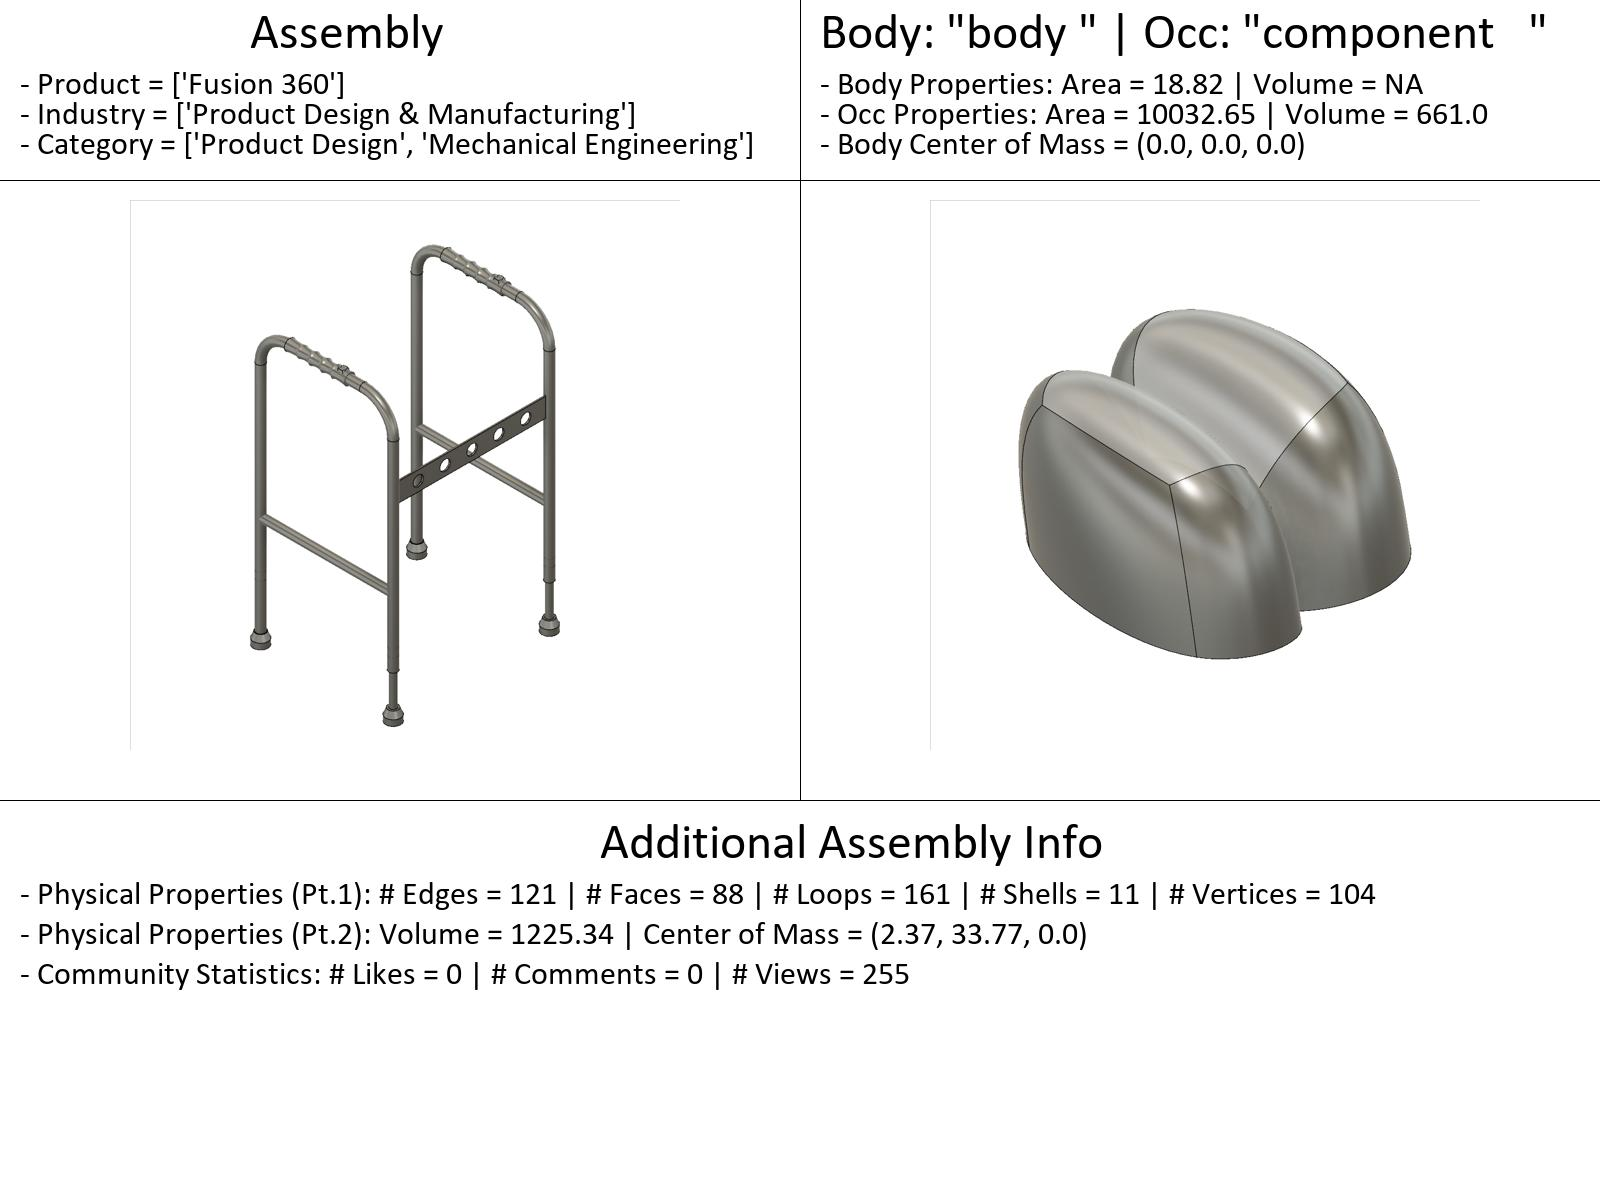

In [27]:
# Start manually labeling

annotations = annotate_functional_basis(
    operating_sys = labeler_os,
    label_info = LABELS_FINAL_OUT_DIR,
    examples = prompt_images,
    options_1 = material_options,
    display_fn=lambda filename: display(Image(filename))
)


# Step 3: Upload your labels to the Google Drive

1. Please make sure that you labeled **ALL images** that are to be labeled. (Note: you can check this by re-running the previous cell using Ctrl+Enter)

2. Please make sure that you upload the CSV file **"\[your name\]-HumanBaseline-\[ID\].csv"** to the corresponding folder on Google Drive.

3. Please also make sure you indicate that you have **"Finished Labeling"** your dataset on the spreadsheet.

# Annotation Finished - Thank You!